# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint

# Import API key
#import api_key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="


response = requests.get(query_url + "rikitea").json()
        
response

{'coord': {'lon': -134.97, 'lat': -23.12},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 24.87,
  'pressure': 1016.6,
  'humidity': 80,
  'temp_min': 24.87,
  'temp_max': 24.87,
  'sea_level': 1016.6,
  'grnd_level': 1016.35},
 'wind': {'speed': 5.96, 'deg': 34.728},
 'rain': {'3h': 1.813},
 'clouds': {'all': 100},
 'dt': 1559238480,
 'sys': {'message': 0.0052,
  'country': 'PF',
  'sunrise': 1559230377,
  'sunset': 1559269334},
 'timezone': -32400,
 'id': 4030556,
 'name': 'Rikitea',
 'cod': 200}

In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [7]:
# Create empty lists to append the API data into lists 
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for x in range(len(cities)):
    try:
        
        #for city in cities:
            
        response = requests.get(query_url + cities[x]).json()
            
            #for weather in response:
            
            #print(response)
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        country.append(response["sys"]["country"])
        wind_speed.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["sys"]["sunrise"])
        name.append(response["name"])
        
        print(f"Processing Record {x} of {len(cities)}  | {cities[x]}")
        

    # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
 
    except :
        print("City not found. Skipping...")  
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 0 of 579  | caravelas
Processing Record 1 of 579  | pavlogradka
Processing Record 2 of 579  | tuktoyaktuk
Processing Record 3 of 579  | yagodnoye
Processing Record 4 of 579  | senanga
Processing Record 5 of 579  | hermanus
Processing Record 6 of 579  | salisbury
Processing Record 7 of 579  | vao
Processing Record 8 of 579  | along
Processing Record 9 of 579  | lompoc
Processing Record 10 of 579  | constitucion
Processing Record 11 of 579  | qaanaaq
Processing Record 12 of 579  | nikolskoye
Processing Record 13 of 579  | rikitea
Processing Record 14 of 579  | busselton
Processing Record 15 of 579  | bluff
City not found. Skipping...
Processing Record 17 of 579  | saint-philippe
City not found. Skipping...
Processing Record 19 of 579  | port hedland
Processing Record 20 of 579  | strezhevoy
City not found. Skipping...
Processing Record 22 of 579  | khatanga
Processing Record 23 of 579  | aklavik
Processing Record 

Processing Record 205 of 579  | ibra
Processing Record 206 of 579  | saveh
Processing Record 207 of 579  | valleyview
City not found. Skipping...
Processing Record 209 of 579  | wajir
Processing Record 210 of 579  | alyangula
Processing Record 211 of 579  | mount gambier
Processing Record 212 of 579  | alice springs
Processing Record 213 of 579  | manica
City not found. Skipping...
Processing Record 215 of 579  | rawson
Processing Record 216 of 579  | tirat karmel
Processing Record 217 of 579  | baykit
Processing Record 218 of 579  | touros
Processing Record 219 of 579  | florianopolis
Processing Record 220 of 579  | leh
Processing Record 221 of 579  | kirakira
Processing Record 222 of 579  | namibe
City not found. Skipping...
Processing Record 224 of 579  | te anau
Processing Record 225 of 579  | marsh harbour
Processing Record 226 of 579  | yulara
City not found. Skipping...
Processing Record 228 of 579  | carnarvon
Processing Record 229 of 579  | marakkanam
Processing Record 230 of 

City not found. Skipping...
Processing Record 414 of 579  | nantucket
Processing Record 415 of 579  | necochea
Processing Record 416 of 579  | fortuna
Processing Record 417 of 579  | khani
Processing Record 418 of 579  | kapuskasing
Processing Record 419 of 579  | bilibino
City not found. Skipping...
Processing Record 421 of 579  | natitingou
City not found. Skipping...
Processing Record 423 of 579  | baruun-urt
City not found. Skipping...
Processing Record 425 of 579  | sangar
Processing Record 426 of 579  | novovoronezh
Processing Record 427 of 579  | lensk
City not found. Skipping...
Processing Record 429 of 579  | nisko
Processing Record 430 of 579  | santa rosa
Processing Record 431 of 579  | zhangjiakou
Processing Record 432 of 579  | benguela
Processing Record 433 of 579  | elat
Processing Record 434 of 579  | haines junction
Processing Record 435 of 579  | rundu
Processing Record 436 of 579  | cairns
Processing Record 437 of 579  | erenhot
Processing Record 438 of 579  | lyanga

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_data.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [7]:
# Save data frame to CSV
weather_data.to_csv('Output/weather_data.csv')

# Display data frame head 
weather_data.head()

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0  Severo-Kurilsk         100      RU  1559237384        93  50.68  156.12   
1         Mataura          39      NZ  1559247315        86 -46.19  168.86   
2          Atuona          18      PF  1559229962        76  -9.80 -139.03   
3            Nome          40      US  1559215063        83  30.04  -94.42   
4         Ushuaia          20      AR  1559220082        60 -54.81  -68.31   

   Max Temp  Wind Speed  
0      4.47       17.48  
1      4.77        1.77  
2     28.27        7.88  
3     31.11        4.10  
4      5.00        5.10

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

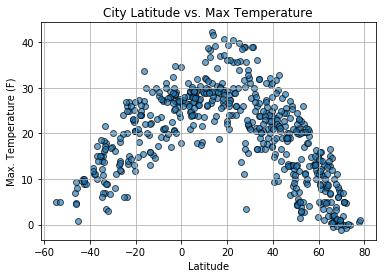

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", alpha=0.65, edgecolors="black")

#Graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_Temperature.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

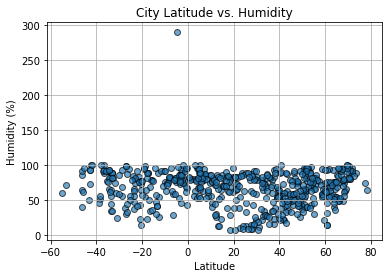

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", alpha=0.65, edgecolors="black")

# Graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

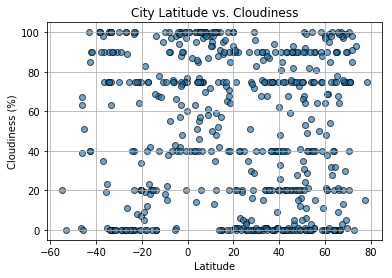

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", alpha=0.65, edgecolors="black")

# Graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

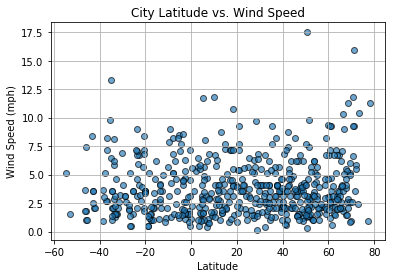

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",alpha=0.65, edgecolors="black")

# Graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()